In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import networkx as nx

from sklearn.covariance import GraphicalLassoCV, GraphicalLasso
from sklearn.preprocessing import StandardScaler

In [65]:
# Read data
X = pd.read_csv("yeast.txt",sep="\t")
X.columns = ("CBF1", "GAL4", "SWI5", "GAL80", "ASH1")

In [95]:
# Calculate precision matrix (GraphicalLasso calculates the covariance for you, there is also graphical_lasso(cov_matrix))
cov = GraphicalLasso(alpha=0.3).fit(X)
cov = cov.precision_

# Calculate partial correlations from the precision matrix
norm = np.eye(len(cov))*np.sqrt(1/cov.diagonal())
part = -norm @ netw @ norm # normalize by sqrt(pii*pjj)

# Remove the correlations and round (for visualization)
np.fill_diagonal(part, 0)
part = np.around(part, 3) 

# Convert to a pandas datafrmae
Xn = pd.DataFrame(np.tril(part))
Xn.columns = X.columns
Xn.index = X.columns



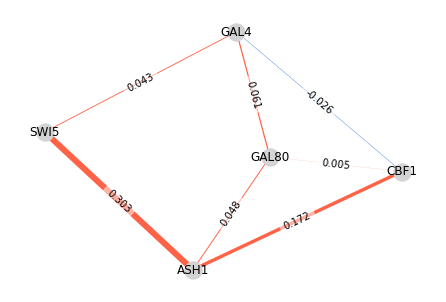

In [97]:
# Create newtork
G = nx.from_pandas_adjacency(Xn)
pos = nx.kamada_kawai_layout(G, weight=None)
labels = nx.get_edge_attributes(G,'weight')
colors = ["tomato" if _>0 else "cornflowerblue" for _ in labels.values()]
nx.draw(G, pos = pos,node_color="lightgray", with_labels=True, width = 20*np.array(list(labels.values())), edge_color = colors)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,bbox={"alpha":0.5, "color": "white"})
plt.show()